In [13]:
from nn_architectures import Model1, Model2, Model3, Model4, Model5
from utils import *
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np

# Loading and Preprocessing Data

In [14]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

cols_to_drop = ['PassengerId', 'Ticket', 'Name', 'Cabin']
X_train = train_data.drop(cols_to_drop, axis=1).iloc[:, 1:]
y_train = train_data['Survived']
X_test = test_data.drop(cols_to_drop, axis=1)
y_test = pd.read_csv('data/gender_submission.csv').drop('PassengerId', axis=1)

In [15]:
embarked_labels = X_train['Embarked'].unique().copy()
sex_labels = X_train['Sex'].unique().copy()

for x in [X_train, X_test]:
    x.dropna(inplace=True)
    x['Embarked'] = x['Embarked'].map({e: i for i, e in enumerate(embarked_labels)})
    x['Sex'] = x['Sex'].map({e: i for i, e in enumerate(sex_labels)})

y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]

In [16]:
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32).unsqueeze(dim=1)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), shuffle=False)

# Training Models

## Model 1

Epoch 0: Batch Loss - 14.799758911132812
Epoch 40: Batch Loss - 9.234490394592285
Epoch 80: Batch Loss - 8.504056930541992
Epoch 120: Batch Loss - 7.238697052001953
Epoch 160: Batch Loss - 7.097649097442627
Epoch 200: Batch Loss - 6.449221134185791
Epoch 240: Batch Loss - 5.841291904449463
Epoch 280: Batch Loss - 5.195489883422852
Epoch 320: Batch Loss - 5.5471625328063965
Epoch 360: Batch Loss - 4.59212064743042


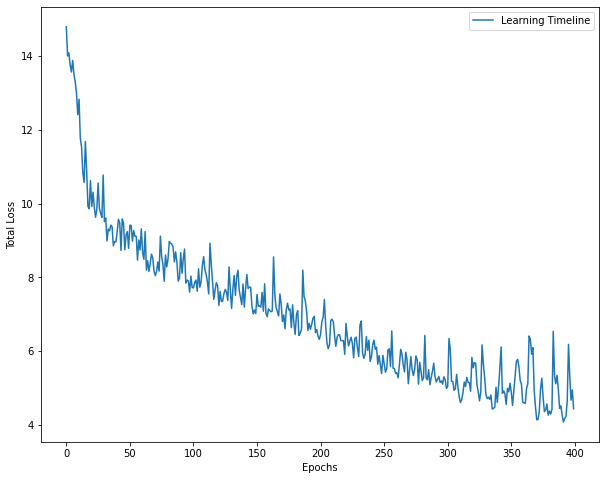

Accuracy: 0.7855
Recall: 0.7953
Precision: 0.6918
F1: 0.7399


In [17]:
evaluate_model(Model1(X_train.shape[1]), train_loader, X_test, y_test, 400, 'model1')

## Model 2

Epoch 0: Batch Loss - 14.713666915893555
Epoch 40: Batch Loss - 10.104900360107422
Epoch 80: Batch Loss - 9.291547775268555
Epoch 120: Batch Loss - 8.659549713134766
Epoch 160: Batch Loss - 8.932126998901367
Epoch 200: Batch Loss - 7.953179836273193
Epoch 240: Batch Loss - 8.054828643798828
Epoch 280: Batch Loss - 7.402491092681885
Epoch 320: Batch Loss - 6.721077919006348
Epoch 360: Batch Loss - 6.763603210449219


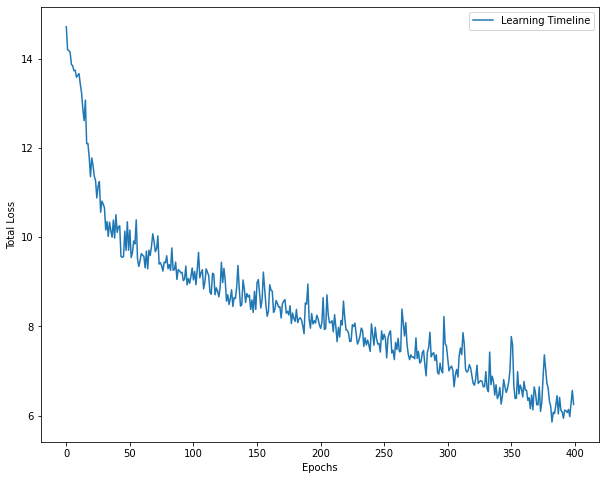

Accuracy: 0.7915
Recall: 0.7087
Precision: 0.7377
F1: 0.7229


In [18]:
evaluate_model(Model2(X_train.shape[1]), train_loader, X_test, y_test, 400, 'model2')